In [ ]:
!ls

# Практическое задание №5

Загрузка и подготовка данных

In [ ]:
!wget https://github.com/krashivan/working_files/raw/main/PA2HW1/marketing_campaign.csv

In [ ]:
!wget https://github.com/krashivan/working_files/raw/main/PA2HW1/subscribers.csv

In [ ]:
!wget https://github.com/krashivan/working_files/raw/main/PA2HW1/users.csv

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

df_mark = pd.read_csv('marketing_campaign.csv', header = 0, sep=',')
df_sub = pd.read_csv('subscribers.csv', header = 0, sep=',')
df_user = pd.read_csv('users.csv', header = 0, sep=',')

print(f'marketing_campaign - {len(df_mark)}\nsubscribers - {len(df_sub)}\nusers - {len(df_user)}')

df = pd.merge(df_mark, df_sub, on = 'user_id', how = 'left').merge(df_user, on = 'user_id', how = 'left')

marketing_campaign - 10037
subscribers - 10037
users - 10037


## Задание 1

Взять датасет из домашнего задания №2. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [ ]:
df_var_conv = df.loc[df['converted'] == True, ['variant', 'converted']].groupby('variant')['converted'].count()
df_var_notconv = df.loc[df['converted'] == False, ['variant', 'converted']].groupby('variant')['converted'].count()

df_var = pd.merge( df_var_conv, df_var_notconv,  on = 'variant', how = 'left')
df_var.columns = ['converted', 'not_converted']
df_var.index.name = None

df_var

,converted,not_converted
control,371,4705
personalization,705,4241


In [ ]:
import scipy.stats as stats
result = stats.chi2_contingency(df_var, correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))

chisq = 126.07767827548582, pvalue = 2.9568009705199523e-29


Вывод: поскольку значимость A/B теста 2.96e-29 менее допустимого уровня значимости 0,05, то нулевую гипотезу о равенстве конверсий в группах можно отклонить, т.е. группа 'personalization' - действительно генерирует статистически больше конверсий, чем группа 'control'

## Задание 2

Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [ ]:
def value(x):
    return - 45*x[0] - 80*x[1]

neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([400 - 5 * x [0] - 20 * x [1],
                                         450 - 10 * x [0] - 15 * x [1]])}

from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

from scipy.optimize import minimize
x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)

print(f'Максимальную прибыль в {-1*value([24, 14])} долларов цех получит при производстве {math.ceil(res.x[0])} стульев и {math.ceil(res.x[1])} столов')

Максимальную прибыль в 2200 долларов цех получит при производстве 24 стульев и 14 столов


## Задание 3

Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил:

day1 0.4\$,

day3 0.6\$,

day7 0.8\$,

day14 1.10\$,

day21 1.30\$,

day30 1.40\$.

Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = a*b^x или y = a*ln(x) + b.

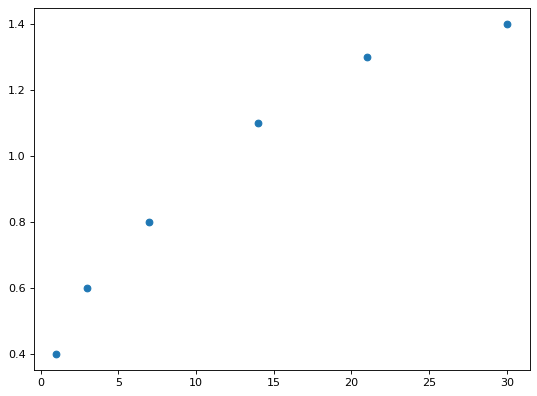

In [ ]:
df = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'cumulative ARPU': [0.4,0.6,0.8,1.1,1.3,1.4]})

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['cumulative ARPU'], label="Original Data" )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


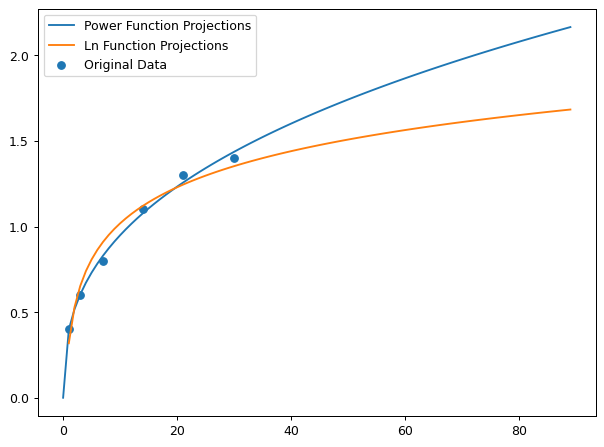

In [ ]:
def power_func(x, a, b):
    return a * np.power(x, b)

def ln_func(x, a, b):
    return a * np.log(x) + b

from scipy.optimize import curve_fit
power_popt, power_pcov = curve_fit(power_func, df['day'], df['cumulative ARPU'])

ln_popt, ln_pcov = curve_fit(ln_func, df['day'], df['cumulative ARPU'])

projection_endpoint = 90

power_y_projected = power_func(np.arange(projection_endpoint), *power_popt)
ln_y_projected = ln_func(np.arange(projection_endpoint), *ln_popt)

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['cumulative ARPU'], label="Original Data")
plt.plot(power_y_projected, label="Power Function Projections")
plt.plot(ln_y_projected, label="Ln Function Projections")
plt.legend()
plt.show()

In [ ]:
print('Прогноз кол-ва пользователей через 90 дней по Power модели', round(power_y_projected[89],2))
print('Прогноз кол-ва пользователей через 90 дней по ln модели', round(ln_y_projected[89],2))

Прогноз кол-ва пользователей через 90 дней по Power модели 2.17
Прогноз кол-ва пользователей через 90 дней по ln модели 1.68


In [ ]:
y_power_pred = [power_y_projected[ i ] for i in list(df['day'])]
y_power_pred_np = np.array(y_power_pred)

y_ln_pred = [ln_y_projected[ i ] for i in list(df['day'])]
y_ln_pred_np = np.array(y_ln_pred)

real_data_np = np.array([i for i in list(df['cumulative ARPU'])])



---



Среднеквадратическая ошибка 'power' модели y = ab^x

аппроксимация по показательной функции

In [ ]:
np.sum(np.power(np.power(real_data_np - y_power_pred_np, 2), 0.5)) / len(real_data_np)

0.022904146555173577

Среднеквадратическая ошибка 'ln' модели y = aln(x) + b

аппроксимация по функции натурального логарифма

In [ ]:
np.sum(np.power(np.power(real_data_np - y_ln_pred_np, 2), 0.5)) / len(real_data_np)

0.0613540760654314

Вывод: показательная функция аппроксимирует исследуемую зависимость с меньшей среднеквадратической ошибкой, поэтому целесообразнее использовать для прогноза только данную функцию.